# *k*Mmeans Clustering and Principal Component Analysis

### *k*Means clustering

*   Suppose a data set $D$, contains $n$ objects, distribute the objects in $D$ into $k$ clusters
*   Distance measures: **Euclidean**, Manhattan, Minkowski
*   Minimise within-cluster sum-of-squared error(SSE), but only local optimal will be achieved
*   Characteristics of *k*Means:
 *  Needs one input parameters
 *  Can be scalable on very large data set
 *  Sensitive to outliers
 *  Flat geometry, distances between objects
 *  Suitable for not too many clusters; when $k$ is unknown, use Elbow method (https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) or Silhouette analysis (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
* *k*Means clustering algorithm
 * Randomly choosing the initial centroid(s)
 * Computing the distance between each object and centroid and assign the object to the closest centroid
 * Computing the within-cluster sum of squared errors and update the centroid of each cluster
 * Iterating the above two steps until the within-cluster sum of squared errors are minimised

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9780123814791/files/images/F000101f10-03-9780123814791.jpg">

Fig 2. Clustering of a set of objects using the k-means method; for (b) update cluster centers and reassign objects accordingly (the mean of each cluster is marked by a +).

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from IPython.display import Image

### Real world example: Perform image compression using *k*Means

#### Random Initialisation

#### Image Compression with *k*Mmeans

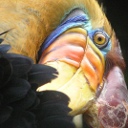

In [2]:
# visualise the data
Image(filename='bird_small.png')

#### Load the dataset `bird_small.mat`

In [3]:
# load the data
data = loadmat('bird_small.mat')
# The matrix 'A' contains the RGB values of the image
A = data["A"]

# a 128x128 image with 3 color channels (RGB)
print(A.shape)

(128, 128, 3)


#### Reshape the dataset for easier computation

In [4]:
# Normalize and reshape the image data for k-means clustering
A = A / 255
# Reshape the 3D image array into a 2D array for k-means
X = A.reshape(A.shape[0] * A.shape[1], -1)

print(X.shape)  # Expected output: (16384, 3), where 16384 = 128*128 (total number of pixels)

(16384, 3)


In [5]:
# function to generate random initial centroids
def kMeansInitCentroids(X, K):
    rng = np.random.RandomState(0)
    idx = np.arange(X.shape[0])
    rng.shuffle(idx)
    centroids = X[idx[:K]]
    return centroids

#### With 16 clusters, run the *k*Means algorithm on the dataset

In [6]:
# function to recompute the new centroids for each cluster after assignments
def computeCentroids(X, idx, K):

    # Initialize an array to store the new centroids
    # The array has K rows (one for each centroid) and the same number of columns as the dataset X
    centroids = np.zeros((K, X.shape[1]))

    # Loop over each cluster index from 0 to K-1
    for i in range(K):
        # Select all the data points assigned to the i-th cluster
        # The condition idx == i creates a boolean array that is True where the elements of idx match i
        # X[idx == i] selects the rows from X where this condition is True
        # Calculate the mean of the assigned points along each feature dimension
        # np.mean calculates the average across the specified axis (axis=0 computes mean along columns)
        # The resulting mean for each feature becomes the new centroid for this cluster
        centroids[i] = np.mean(X[idx ==  i], axis=0)
    return centroids

In [7]:
# function to compute the distance between each point and centroid
def findClosestCentroids(X, centroids):
    # Initialize an array to store the index of the closest centroid for each data point
    idx = np.zeros(X.shape[0])

    # Loop through each data point in the dataset X
    for i in range(X.shape[0]):
        # Euclidean distance
        # Calculate the Euclidean distance between the i-th data point and each centroid
        # The operation involves subtracting each centroid from the data point, squaring the result,
        # and summing up all the squares.
        dist = np.sum(np.power(X[i] - centroids,2), axis=1)
        # Find the index of the centroid with the minimum distance to the i-th data point
        # The np.argmin function returns the index of the smallest value in the distance array,
        # which corresponds to the closest centroid.
        idx[i]= np.argmin(np.sqrt(dist))

    # Return the array of indices that indicate the closest centroid for each data point
    # Each index in idx corresponds to the centroid that is closest to the data point at the same index in X.
    return idx

In [8]:
# run kMeans based on maximum number of iterations
def runKmeans(X, initial_centroids, max_iter):
    # Determine the number of clusters K based on the shape of the initial centroids array
    K = initial_centroids.shape[0]

    # Set the initial centroids as provided by the user or an automated process
    centroids = initial_centroids

    # Iterate over the algorithm for the specified number of maximum iterations
    # This loop continually updates the centroids based on the data points assigned to each cluster
    for _ in range(max_iter):
        # Find the closest centroids for each data point in the dataset
        # idx is an array where each element is the index of the nearest centroid for each data point
        idx = findClosestCentroids(X, centroids)

        # Recompute the centroids by calculating the mean of all points assigned to each cluster
        # This step updates the centroids to be the center of all points currently assigned to each cluster
        centroids = computeCentroids(X, idx, K)

    # Return the final indices of nearest centroids for each data point and the final centroids
    # The idx array shows the cluster membership for each data point in the dataset X
    # The centroids array contains the coordinates for each centroid after the last iteration
    return idx, centroids

In [9]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
idx, centroids = runKmeans(X, initial_centroids, max_iters)
print(idx[:5])
print(centroids[:5])

[0. 0. 0. 0. 0.]
[[0.87105964 0.71310375 0.44781052]
 [0.18825202 0.18365121 0.17592184]
 [0.47697173 0.34930181 0.1956746 ]
 [0.65527778 0.48053105 0.22705474]
 [0.74235017 0.62085688 0.39412359]]


In [10]:
centroids

array([[0.87105964, 0.71310375, 0.44781052],
       [0.18825202, 0.18365121, 0.17592184],
       [0.47697173, 0.34930181, 0.1956746 ],
       [0.65527778, 0.48053105, 0.22705474],
       [0.74235017, 0.62085688, 0.39412359],
       [0.07343631, 0.07981836, 0.06948434],
       [0.86693392, 0.57718509, 0.25871445],
       [0.56730723, 0.48875426, 0.45355134],
       [0.11577909, 0.1241977 , 0.11459102],
       [0.51659078, 0.64663389, 0.8272203 ],
       [0.29860552, 0.26268123, 0.25479551],
       [0.69147534, 0.62305458, 0.57770516],
       [0.81961417, 0.74891841, 0.74348514],
       [0.95487199, 0.83713075, 0.60022262],
       [0.97605466, 0.93821747, 0.79922163],
       [0.41403286, 0.38151563, 0.40527822]])

In [11]:
# convert the features back to 128 x 128
X_recovered = centroids[findClosestCentroids(X, centroids).astype(int)]
X_recovered = X_recovered.reshape(A.shape[0], A.shape[1], A.shape[2])
print(X_recovered.shape)

(128, 128, 3)


In [12]:
X_recovered

array([[[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       [[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       [[0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        [0.87105964, 0.71310375, 0.44781052],
        ...,
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434]],

       ...,

       [[0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0.07981836, 0.06948434],
        [0.07343631, 0

#### Visualise the dataset

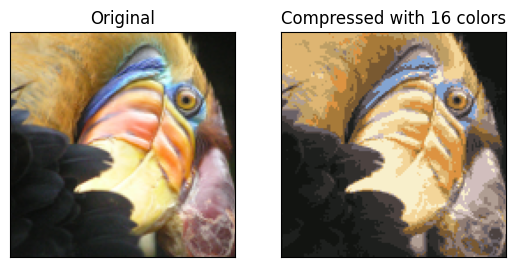

In [13]:
# visualise the compressed image
plt.figure()
plt.subplot(121)
plt.imshow(A)
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(X_recovered)
plt.xticks([])
plt.yticks([])
plt.title("Compressed with 16 colors")
plt.show()

### Perform *k*Means clustering on `ex7data2.mat`dataset

#### Load `extdata2.mat `

In [14]:
# load the data
data = loadmat("ex7data2.mat")
X = data["X"]

# Output the shape of the data to verify loading
print(X.shape)

(300, 2)


In [15]:
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

#### Elbow method - choose K



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

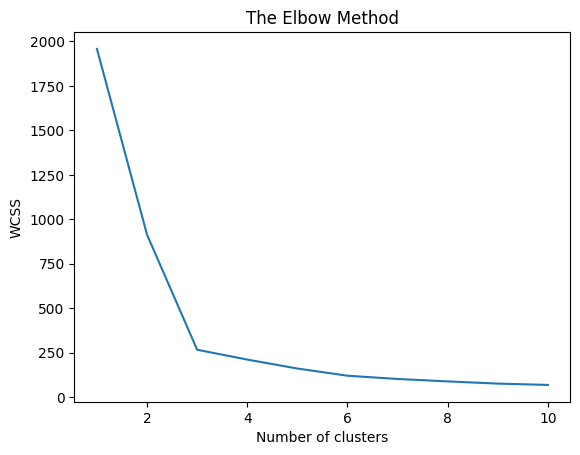

In [16]:
# Implement the Elbow Method to determine the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# within-cluster sum of squares (WCSS) - measures the total variance within each cluster.
# The smaller the WCSS, the more homogeneous the cluster is.
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # Compute within-cluster sum of squares
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Assign initial centroids where the number of clusters is 3 and find the closest centroids

#### Finding the closest centroid

In [17]:
# initialise 3 centroids to form 3 clusters with random values
K = 3

# specify the maximum number of iterations to be 10 as kmeans returns local optimal only
max_iters = 10

# # random centroids
# aer = np.random.randn(K, 2)
# initial_centroids = np.array(aer)

# Use the first three data points as initial centroids instead of predefined points
initial_centroids = X[:3]

In [18]:
# function to compute the distance between each point and centroid
def findClosestCentroids(X, centroids):
    # Initialize an array to store the index of the closest centroid for each data point
    idx = np.zeros(X.shape[0])

    # Loop through each data point in the dataset X
    for i in range(X.shape[0]):
        # Euclidean distance
        # Calculate the Euclidean distance between the i-th data point and each centroid
        # The operation involves subtracting each centroid from the data point, squaring the result,
        # and summing up all the squares.
        dist = np.sum(np.power(X[i] - centroids,2), axis=1)
        # Find the index of the centroid with the minimum distance to the i-th data point
        # The np.argmin function returns the index of the smallest value in the distance array,
        # which corresponds to the closest centroid.
        idx[i]= np.argmin(np.sqrt(dist))

    # Return the array of indices that indicate the closest centroid for each data point
    # Each index in idx corresponds to the centroid that is closest to the data point at the same index in X.
    return idx

In [24]:
idx = findClosestCentroids(X, initial_centroids)
print(idx[:3])

[0. 1. 2.]


#### Run K-means and update centroids

In [22]:
# run kMeans based on maximum number of iterations
def runKmeans(X, initial_centroids, max_iter):
    # Determine the number of clusters K based on the shape of the initial centroids array
    K = initial_centroids.shape[0]

    # Set the initial centroids as provided by the user or an automated process
    centroids = initial_centroids

    # Iterate over the algorithm for the specified number of maximum iterations
    # This loop continually updates the centroids based on the data points assigned to each cluster
    for _ in range(max_iter):
        # Find the closest centroids for each data point in the dataset
        # idx is an array where each element is the index of the nearest centroid for each data point
        idx = findClosestCentroids(X, centroids)

        # Recompute the centroids by calculating the mean of all points assigned to each cluster
        # This step updates the centroids to be the center of all points currently assigned to each cluster
        centroids = computeCentroids(X, idx, K)

    # Return the final indices of nearest centroids for each data point and the final centroids
    # The idx array shows the cluster membership for each data point in the dataset X
    # The centroids array contains the coordinates for each centroid after the last iteration
    return idx, centroids

In [25]:
# function to recompute the new centroids for each cluster after assignments
def computeCentroids(X, idx, K):

    # Initialize an array to store the new centroids
    # The array has K rows (one for each centroid) and the same number of columns as the dataset X
    centroids = np.zeros((K, X.shape[1]))

    # Loop over each cluster index from 0 to K-1
    for i in range(K):
        # Select all the data points assigned to the i-th cluster
        # The condition idx == i creates a boolean array that is True where the elements of idx match i
        # X[idx == i] selects the rows from X where this condition is True
        # Calculate the mean of the assigned points along each feature dimension
        # np.mean calculates the average across the specified axis (axis=0 computes mean along columns)
        # The resulting mean for each feature becomes the new centroid for this cluster
        centroids[i] = np.mean(X[idx ==  i], axis=0)
    return centroids

In [26]:
centroids = computeCentroids(X, idx, K)
print(centroids)

[[2.14349542 3.43826326]
 [4.57911166 4.87731371]
 [5.43504212 2.37956442]]


In [27]:
# run kMeans on the dataset
idx, centroids = runKmeans(X, centroids, max_iters)

#### Visualise the dataset using scatter plot

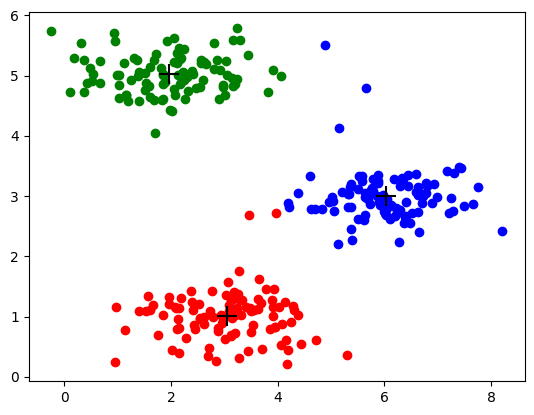

In [93]:
# plot the clusters and mark the centroids
plt.figure()
plt.scatter(X[idx == 0, 0], X[idx == 0, 1], color='red')
plt.scatter(X[idx == 1, 0], X[idx == 1, 1], color='green')
plt.scatter(X[idx == 2, 0], X[idx == 2, 1], color='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker="+", s=200)
plt.show()

### Principal Component Analysis

*   Unsupervised dimensionality reduction technique
*   Uses Singular Value Decomposition(SVD) of the data to project it to a lower dimensional space
*   Useful in processing high-dimensional data where multi-colinearity exists between the features
*   Can be used for denoising and data compression

<img src="https://miro.medium.com/max/640/1*P8_C9uk3ewpRDtevf9wVxg.png">

Fig 3. Our original data in the xy-plane. (Source: http://setosa.io/ev/principal-component-analysis/)

<img src="https://miro.medium.com/max/640/1*wsezmnzg-0N_RP3meYNXlQ.png">

Fig 4. Our original data transformed by PCA. (Source: http://setosa.io/ev/principal-component-analysis/)


### Real-world example: Perform facial image compression using PCA

#### Face Image Dataset

In [28]:
# load the data
data = loadmat("ex7faces.mat")
X = data["X"]

print(X.shape)

(5000, 1024)


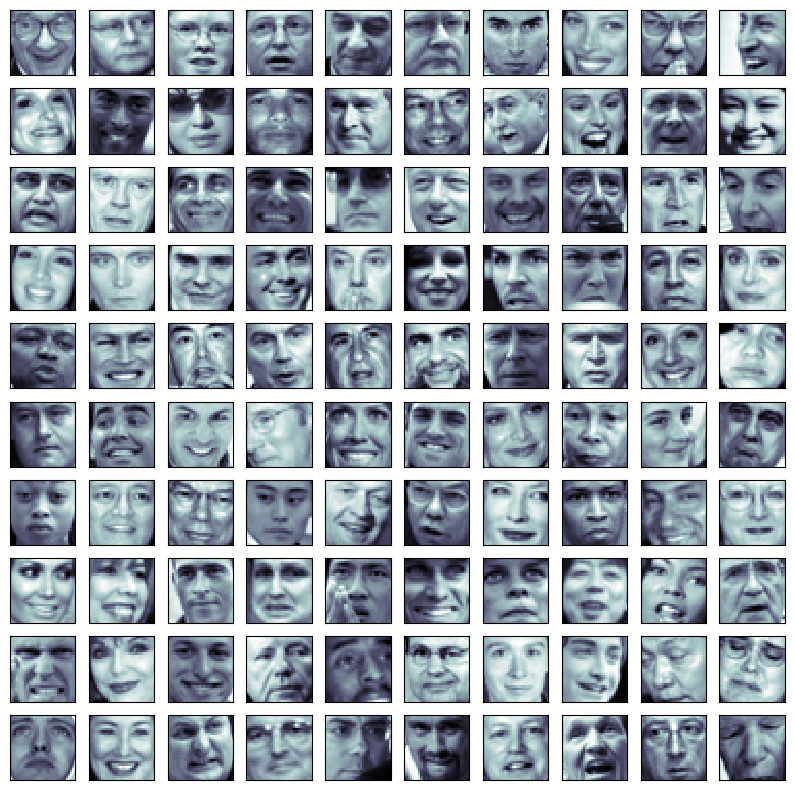

In [29]:
# visualise a sample batch
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Normalise the dataset

In [30]:
# function to normalise the features using z-score normalisation
def featureNormalise(X):
    # Calculate the mean of each feature/column
    mu = np.mean(X, axis=0)
    # Calculate the standard deviation of each feature/column, ddof=1 ensures sample standard deviation
    sigma = np.std(X, ddof=1, axis=0)
    # Normalize the features by subtracting the mean and dividing by the standard deviation
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


# svd factorisation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html,
# Singular Value Decomposition (SVD) based PCA implementation
# A(input) = USV(h), s contains the singular values of A, u are the eigenvectors of AAh, Vh are the eigenvectors of AhA
def pca(X):
    # Compute the covariance matrix of the normalized features
    # Sigma represents covariance when X is normalized
    Sigma = np.dot(X.T, X) / X.shape[0]
    # Perform SVD on the covariance matrix
    # U will contain the principal components (eigenvectors of the covariance matrix)
    # S will contain the singular values, which are related to the eigenvalues of the covariance matrix
    U, S, _ = np.linalg.svd(Sigma)
    return U, S

In [31]:
# apply pca on the data
X_norm, mu, sigma = featureNormalise(X)
U, S = pca(X_norm)

#### Visualise U matrix

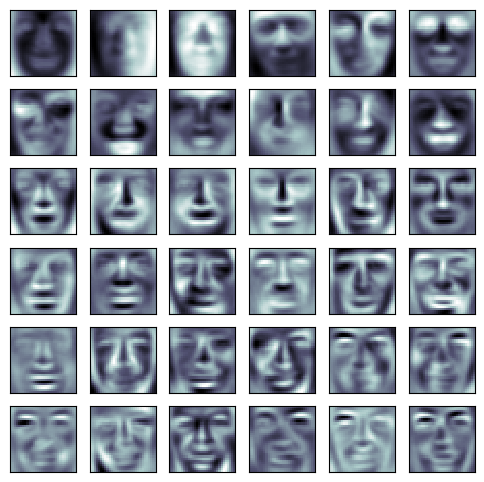

In [32]:
# visaulise the sample batch after pca on each dimension
plt.figure(figsize=(6, 6))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(U[:, i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Reduce the dimension to 100

In [33]:
# Function to project original data onto a lower dimensional space defined by the principal components
def projectData(X, U, K):
    """
    Projects the data X onto the top K principal components.

    Parameters:
    X : array_like
        The data set, where each row is an example and each column represents a feature.
    U : array_like
        The matrix of principal components; each column is a principal component.
    K : int
        The number of principal components to project onto.

    Returns:
    Z : array_like
        The projected data. This output matrix is of shape (number of examples, K).
    """
    # Use numpy dot product to project the data onto the first K columns of U
    # X: original data matrix, U[:, :K]: first K principal components (eigenvectors)
    Z = np.dot(X, U[:, :K])
    return Z

In [34]:
# project data using 100 principal components
K = 100
Z = projectData(X_norm, U, K)
print(Z.shape)

(5000, 100)


#### Reconstruct the original dataset

In [35]:
# Function to convert principal components back to the original dimension
def recoverData(Z, U, K):
    """
    Reconstructs the original data from its projection onto the top K principal components.

    Parameters:
    Z : array_like
        The projected data, where each row is a data point in the reduced dimensional space.
    U : array_like
        The matrix of principal components; each column is a principal component.
    K : int
        The number of principal components that the original data was projected onto.

    Returns:
    X_rec : array_like
        The reconstructed data from the projection. This output has the same number of features as the original dataset.
    """
    # Use numpy dot product to reconstruct the data from its projections
    # Z: projected data matrix, U[:, :K].T: transpose of the first K principal components
    X_rec = np.dot(Z, U[:, :K].T)
    return X_rec


In [36]:
X_rec  = recoverData(Z, U, K)
print(X_rec.shape)

(5000, 1024)


#### Visualise the reconstructed dataset

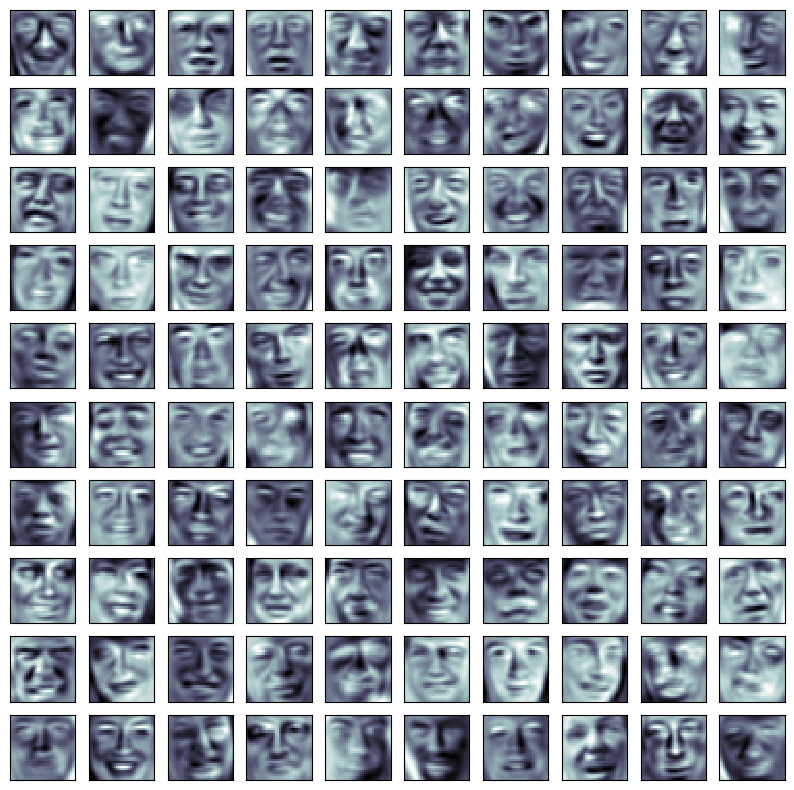

In [37]:
# visualise the sample batch with 100 principal components
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_rec[i].reshape((32, 32)).T,
               cmap=plt.cm.bone, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

### Perform PCA on `ex7data1.mat` dataset


#### Load the dataset `ex7data1.mat`

In [38]:
data = loadmat("ex7data1.mat")
X = data["X"]
print(X.shape)

(50, 2)


#### Visualise the dataset using the scatterplot

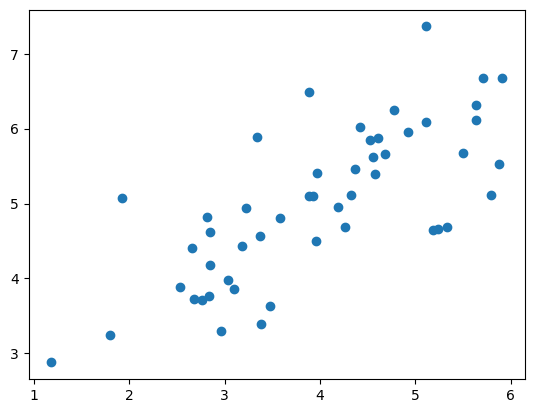

In [39]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### PCA Algorithm

In [40]:
# function to normalise the features using z-score normalisation
def featureNormalise(X):
    # Calculate the mean of each feature/column
    mu = np.mean(X, axis=0)
    # Calculate the standard deviation of each feature/column, ddof=1 ensures sample standard deviation
    sigma = np.std(X, ddof=1, axis=0)
    # Normalize the features by subtracting the mean and dividing by the standard deviation
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


# svd factorisation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html,
# Singular Value Decomposition (SVD) based PCA implementation
# A(input) = USV(h), s contains the singular values of A, u are the eigenvectors of AAh, Vh are the eigenvectors of AhA
def pca(X):
    # Compute the covariance matrix of the normalized features
    # Sigma represents covariance when X is normalized
    Sigma = np.dot(X.T, X) / X.shape[0]
    # Perform SVD on the covariance matrix
    # U will contain the principal components (eigenvectors of the covariance matrix)
    # S will contain the singular values, which are related to the eigenvalues of the covariance matrix
    U, S, _ = np.linalg.svd(Sigma)
    return U, S

#### Normalise the dataset and apply the PCA

In [41]:
X_norm, mu, sigma = featureNormalise(X)
U, S = pca(X_norm)

In [42]:
print(U[:, 0])

[-0.70710678 -0.70710678]


#### Visualise the dataset

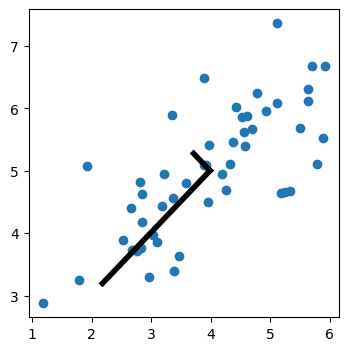

In [43]:
# major trends in the data captured by PCA
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.plot([mu[0], mu[0] + 1.5 * S[0] * U[0, 0]],
         [mu[1], mu[1] + 1.5 * S[0] * U[1, 0]],
         color="black", linewidth=4)
plt.plot([mu[0], mu[0] + 1.5 * S[1] * U[0, 1]],
         [mu[1], mu[1] + 1.5 * S[1] * U[1, 1]],
         color="black", linewidth=4)
plt.show()

#### Dimensionality Reduction with PCA

In [44]:
# Function to project original data onto a lower dimensional space defined by the principal components
def projectData(X, U, K):
    """
    Projects the data X onto the top K principal components.

    Parameters:
    X : array_like
        The data set, where each row is an example and each column represents a feature.
    U : array_like
        The matrix of principal components; each column is a principal component.
    K : int
        The number of principal components to project onto.

    Returns:
    Z : array_like
        The projected data. This output matrix is of shape (number of examples, K).
    """
    # Use numpy dot product to project the data onto the first K columns of U
    # X: original data matrix, U[:, :K]: first K principal components (eigenvectors)
    Z = np.dot(X, U[:, :K])
    return Z

#### Reduce the dimension of dataset to 1

In [45]:
# Specify the number of principal components to retain
K = 1

# Project the normalized data X_norm onto the top K (1 in this case) principal components
Z = projectData(X_norm, U, K)

# Print the first element of the projected data to see the new feature representation
print(Z[0])  # Example output: 1.481274

[1.48127391]


#### Reconstruct the dataset to the original dimension

In [46]:
# Function to convert principal components back to the original dimension
def recoverData(Z, U, K):
    """
    Reconstructs the original data from its projection onto the top K principal components.

    Parameters:
    Z : array_like
        The projected data, where each row is a data point in the reduced dimensional space.
    U : array_like
        The matrix of principal components; each column is a principal component.
    K : int
        The number of principal components that the original data was projected onto.

    Returns:
    X_rec : array_like
        The reconstructed data from the projection. This output has the same number of features as the original dataset.
    """
    # Use numpy dot product to reconstruct the data from its projections
    # Z: projected data matrix, U[:, :K].T: transpose of the first K principal components
    X_rec = np.dot(Z, U[:, :K].T)
    return X_rec


In [47]:
# Reconstruct the dataset from the principal components
X_rec = recoverData(Z, U, K)
print(X_rec[0])  # Example output showing the first reconstructed data point


[-1.04741883 -1.04741883]


#### Visualise both reduced dataset and original dataset

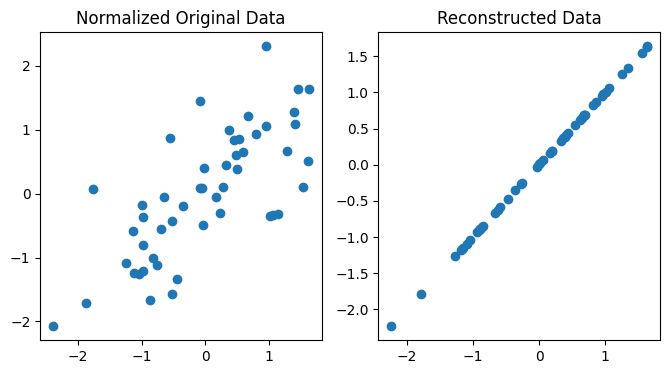

In [48]:
# Visualizing the reduced and reconstructed dataset
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.title("Normalized Original Data")
plt.subplot(122)
plt.scatter(X_rec[:, 0], X_rec[:, 1])
plt.title("Reconstructed Data")
plt.show()